### Data Science: Webscraping  with Python

- Target: Collect data for currently available electric vehicles from Wikipedia.

https://en.wikipedia.org/wiki/List_of_electric_cars_currently_available

In [1]:
import numpy as np
import pandas as pd
import re

from requests import get
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

# html link to webpage 
source_name = 'https://en.wikipedia.org/wiki/List_of_electric_cars_currently_available'

# read html
raw_html = get(source_name, stream=True).content

#parse html
soup = BeautifulSoup(raw_html, 'lxml')

# extract first tables from data
table1 = soup.find_all('table')[0]

# create DataFrame
df1 = pd.read_html(str(table1),header=0)[0]

In [2]:
df1.head()

,Manufacturer,Model,Top speed,Acceleration,Capacity(adults and children),Charging time,Nominal range,Market release date and sales
0,Audi,Audi e-tron (2018),200 km/h (124 mph),6.6 s,5,8.5 hours,328 km (204 mi),2019
1,BMW,i3,150 km/h (93 mph),8 s,4,4h - 6h with the 240 V charging unit or 30 – 4...,246 km (153 mi)[1] MY 2019 (120 A·h) (EPA) 183...,Released in Europe in 2013 and in 2014 in the ...
2,BMW Brilliance,Zinoro 1E,130 km/h (81 mph),7.6 s,4 or 5 depending on size of passenger,NaN,150 km (93 mi)[4],Released in China in early 2014.[5]
3,Bolloré,Bluecar,130 km/h (81 mph),NaN,4,NaN,250 km (160 mi) in urban use150 km (93 mi) on ...,Launched in France in 2011. Cumulative sales t...
4,BYD,e6,140 km/h (87 mph)[7],8 s,5[8],2h (VTOG 30 kW AC charging) 8—9h (SAE Level 2 ...,300 km (186 mi),"Sales to the general public began in October, ..."


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Manufacturer                     50 non-null object
Model                            50 non-null object
Top speed                        45 non-null object
Acceleration                     33 non-null object
Capacity(adults and children)    46 non-null object
Charging time                    37 non-null object
Nominal range                    49 non-null object
Market release date and sales    49 non-null object
dtypes: object(8)
memory usage: 3.2+ KB


## Clean Data

In [4]:
# extract top speed using regular expressions

# find and extract string with top speed
df1['lowest model top speed (km/h)'] = df1['Top speed'].str.extract(r'(\d?\d\d.km/h)',expand=True)

# take the first value and convert to numeric value 
df1['lowest model top speed (km/h)'] = pd.to_numeric(df1['lowest model top speed (km/h)'].str.extract('(\d?\d\d)',expand=False))

# find the string with the second top speed value
df1['highest model top speed (km/h)'] = df1['Top speed'].str.extractall(r'(\d?\d\d.km/h)').xs(1,level='match')

# remove 'km/h' and convert str to numeric value
df1['highest model top speed (km/h)'] = pd.to_numeric(df1['highest model top speed (km/h)'].str.extract('(\d?\d\d)',expand=False))

# take the highest number to define 'highest model top speed'
df1['highest model top speed (km/h)'] = df1[['lowest model top speed (km/h)','highest model top speed (km/h)']].max(axis=1)

# list of parameters to drop
drop_list_names = ['Top speed','Charging time','Nominal range', 'Market release date and sales','Capacity(adults and children)']

df1 = df1.drop(drop_list_names , axis=1)

df1['acceleration from 0 to 100 km/h (s)'] = df1['Acceleration'].apply(lambda x: str(x).split()[0]) 
df1['acceleration from 0 to 100 km/h (s)'] = df1['acceleration from 0 to 100 km/h (s)'].apply(lambda x: str(x).replace('s',''))
df1['acceleration from 0 to 100 km/h (s)'] = pd.to_numeric(df1['acceleration from 0 to 100 km/h (s)'],errors='coerce')

In [5]:
df1.head(11)

,Manufacturer,Model,Acceleration,lowest model top speed (km/h),highest model top speed (km/h),acceleration from 0 to 100 km/h (s)
0,Audi,Audi e-tron (2018),6.6 s,200.0,200.0,6.6
1,BMW,i3,8 s,150.0,150.0,8.0
2,BMW Brilliance,Zinoro 1E,7.6 s,130.0,130.0,7.6
3,Bolloré,Bluecar,NaN,130.0,130.0,NaN
4,BYD,e6,8 s,140.0,140.0,8.0
5,Chery,QQ3 EV,NaN,NaN,NaN,NaN
6,Chevrolet,Bolt EV,6.5 s,150.0,150.0,6.5
7,Chevrolet,Spark EV,7.3 s,NaN,NaN,7.3
8,Citroën,C-Zero,15.9 s,130.0,130.0,15.9
9,COURB,C-ZEN,NaN,110.0,110.0,NaN


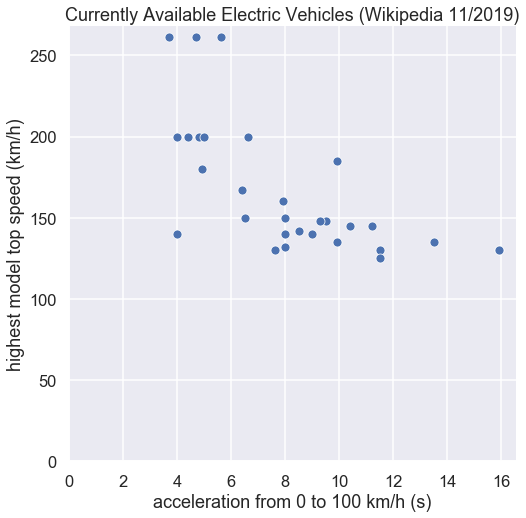

In [7]:
sns.set(context='talk', 
        
       )

# set the figure size
fig = plt.figure(figsize=(8, 8))

g = sns.scatterplot(x='acceleration from 0 to 100 km/h (s)',
                y='highest model top speed (km/h)',
                data=df1
               )

g.set(ylim=(0, None))
g.set(xlim=(0, None))
g.set(title=('Currently Available Electric Vehicles (Wikipedia 11/2019)'))

# remove the top and right spines from plot
sns.despine()

fig.savefig('pictures/scatterplot.png')